In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
houseprices_data = pd.read_csv("HousingPrices-Amsterdam-August-2021.csv")

In [3]:
houseprices_data = houseprices_data[['Zip', 'Price', 'Area', 'Room']]
# tạo cột mới dựa trên cột đã có
houseprices_data['PriceperSqm'] = houseprices_data['Price']/houseprices_data['Area']

## Trực quan hóa dữ liệu với Matplotlib

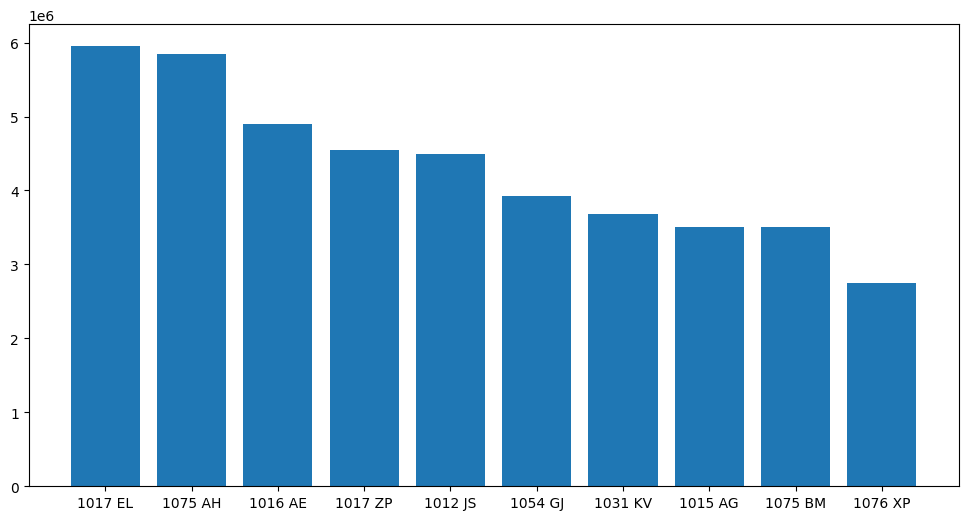

In [4]:
houseprices_sorted = houseprices_data.sort_values('Price', ascending = False)
houseprices_sorted.head()
# case 1: basic
plt.figure(figsize= (12,6))
x = houseprices_sorted['Zip'][0:10]
y = houseprices_sorted['Price'][0:10]
plt.bar(x,y)
plt.show()

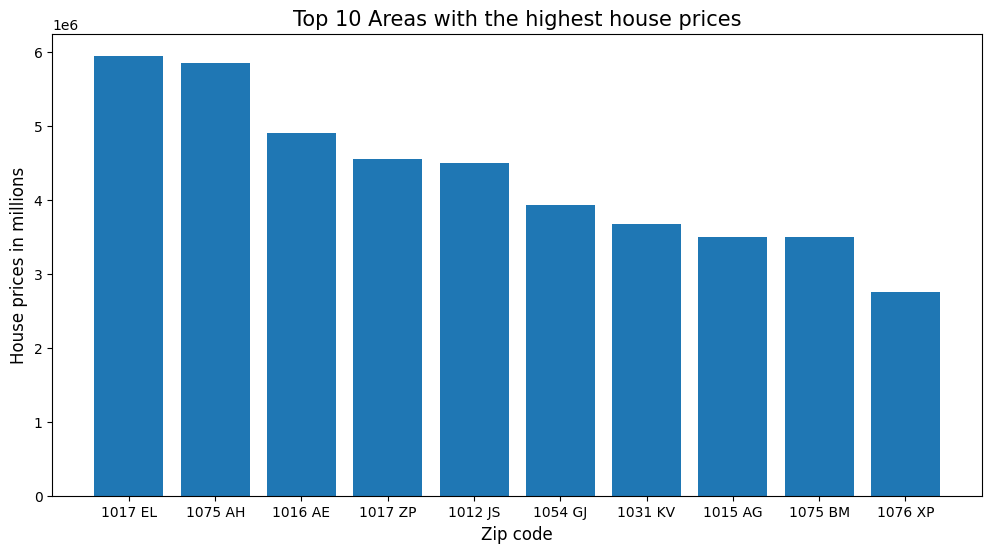

In [5]:
# case 2: advanced 1
plt.figure(figsize= (12,6))
plt.bar(x,y)
plt.title('Top 10 Areas with the highest house prices', fontsize=15)
plt.xlabel('Zip code', fontsize = 12)
plt.xticks(fontsize=10)
plt.ylabel('House prices in millions', fontsize=12)
plt.yticks(fontsize=10)
plt.show()

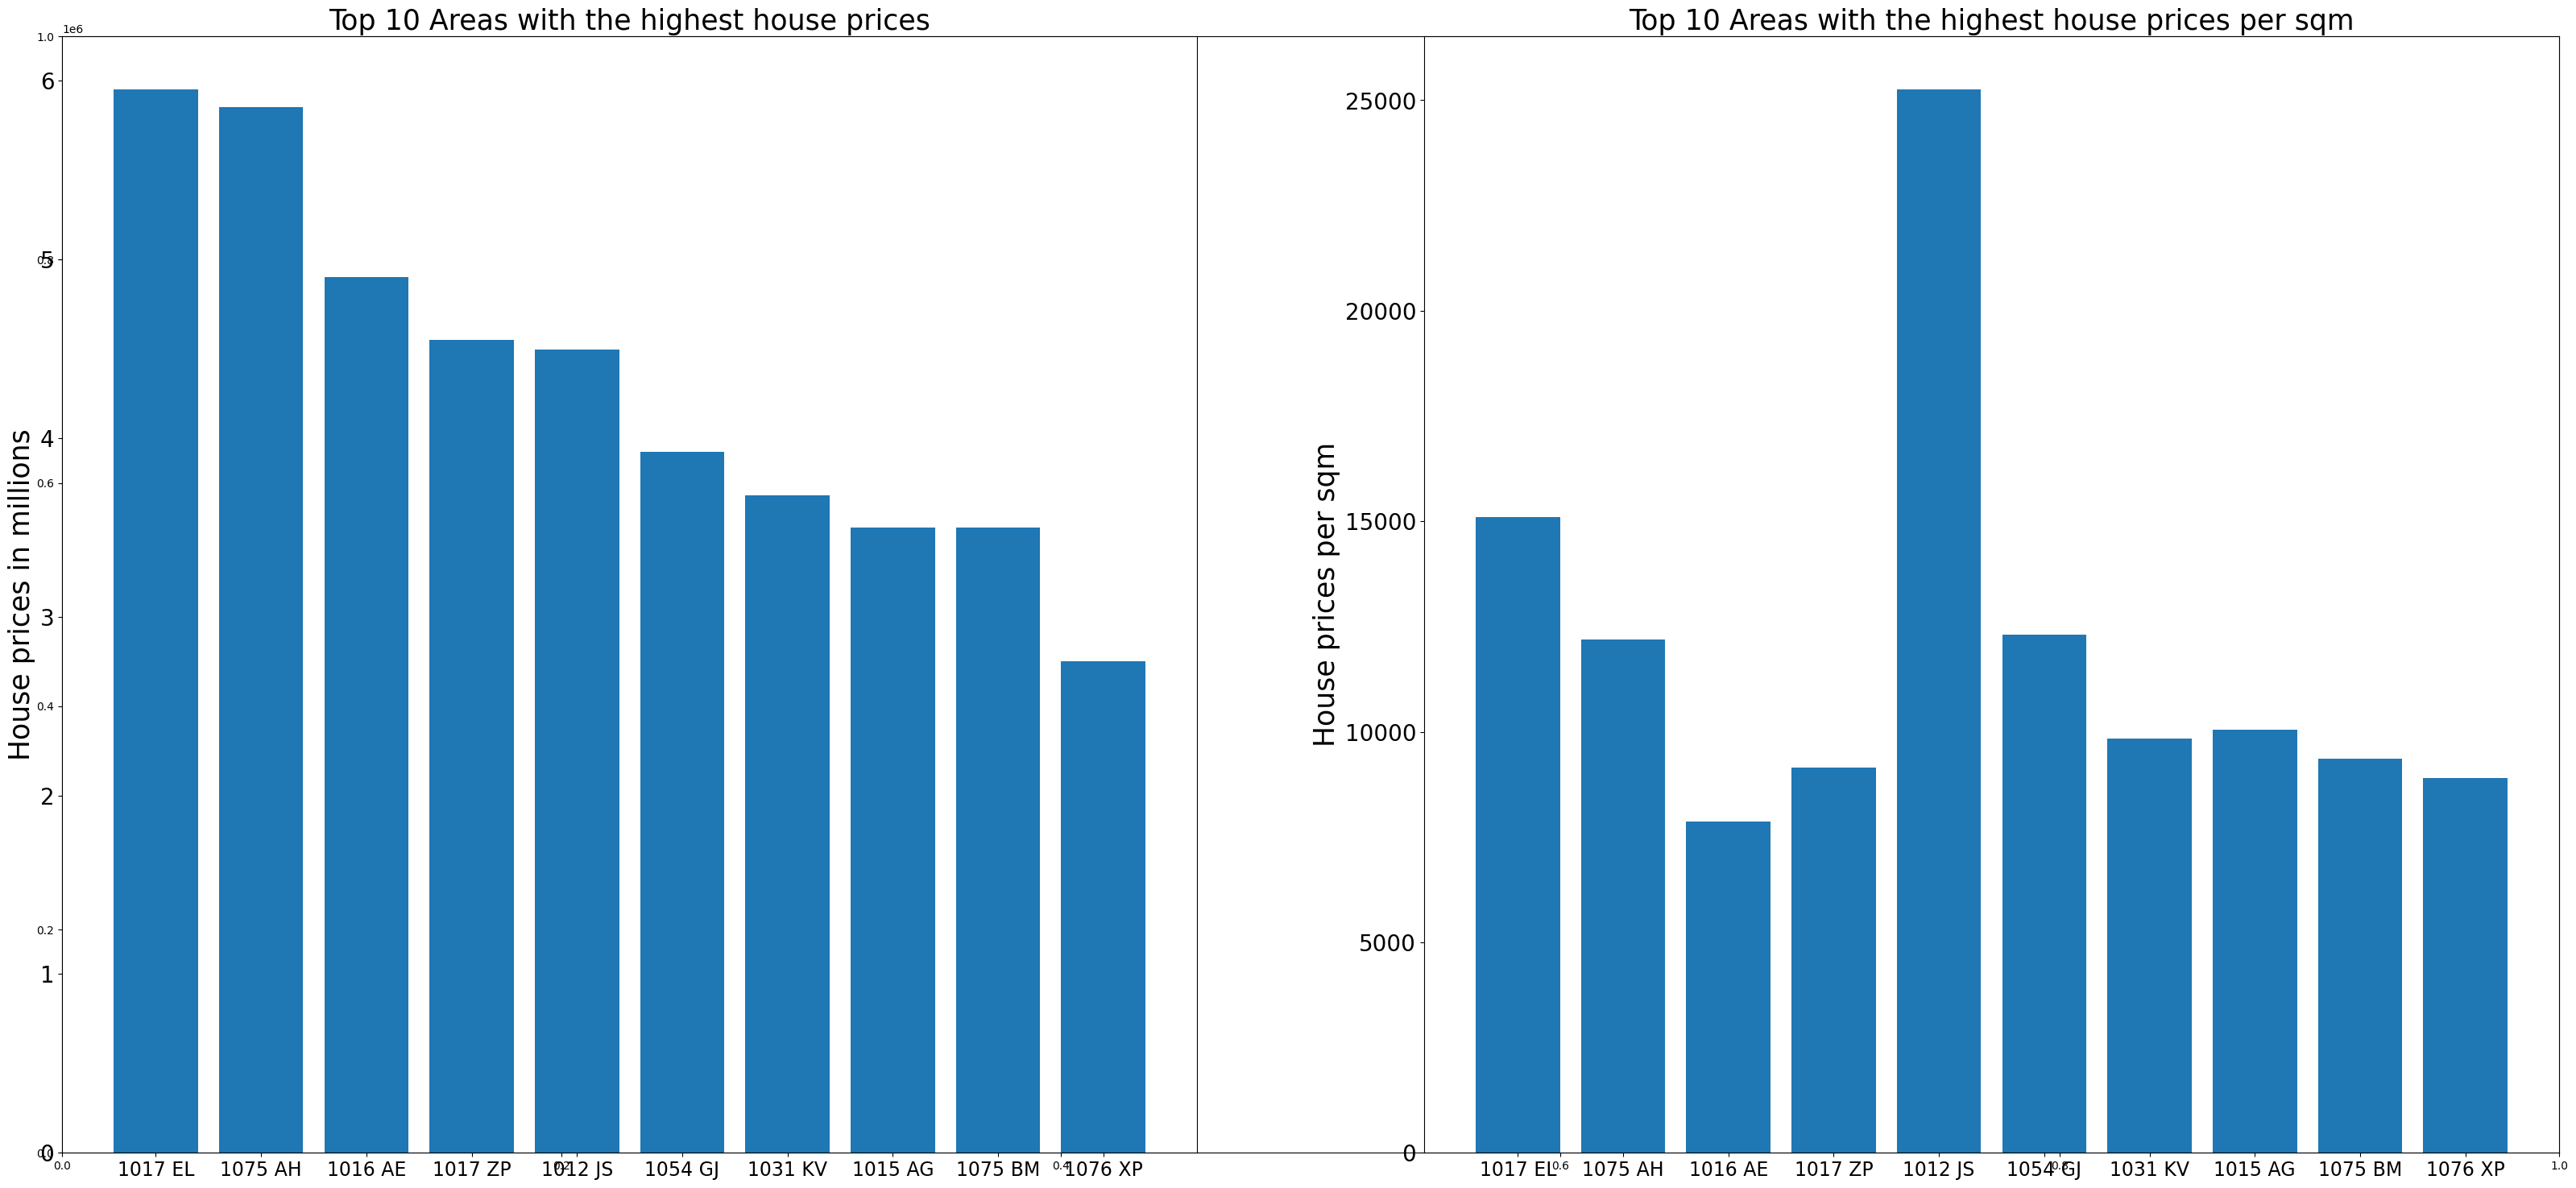

In [6]:
# case 3: advanced 2
fig, ax = plt.subplots(figsize=(40,18))
x = houseprices_sorted['Zip'][0:10]
y = houseprices_sorted['Price'][0:10]
y1 = houseprices_sorted['PriceperSqm'][0:10]
plt.subplot(1,2,1)
plt.bar(x,y)
plt.xticks(fontsize=17)
plt.ylabel('House prices in millions', fontsize=25)
plt.yticks(fontsize=20)
plt.title('Top 10 Areas with the highest house prices',
fontsize=25)
plt.subplot(1,2,2)
plt.bar(x,y1)
plt.xticks(fontsize=17)
plt.ylabel('House prices per sqm', fontsize=25)
plt.yticks(fontsize=20)
plt.title('Top 10 Areas with the highest house prices per sqm',
fontsize=25)
plt.show()

## Trực quan hóa dữ liệu với Seaborn

<Axes: xlabel='Zip', ylabel='Price'>

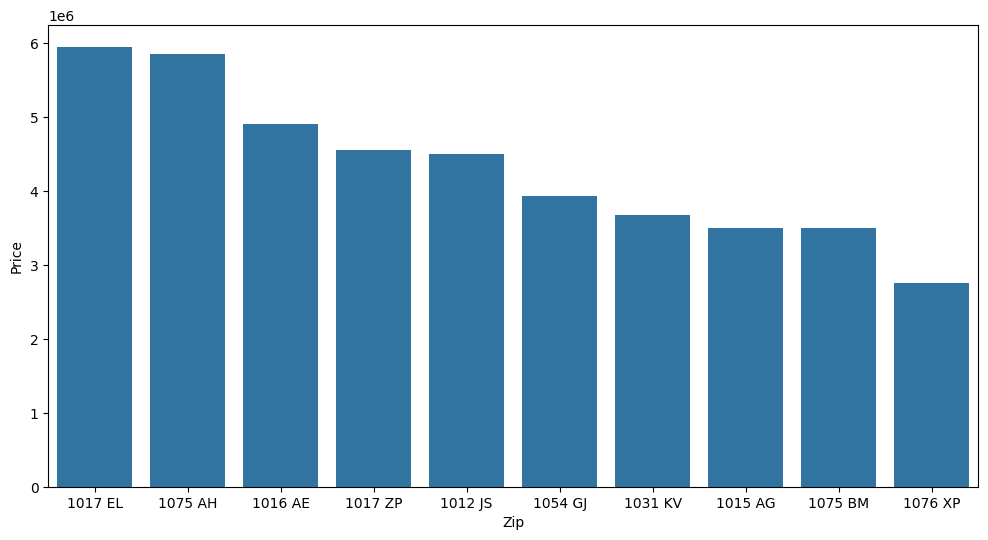

In [7]:
# case 1: basic
plt.figure(figsize= (12,6))
data = houseprices_sorted[0:10]
sns.barplot(data= data, x= 'Zip',y = 'Price')

Text(0.5, 1.0, 'Top 10 Areas with the highest house prices')

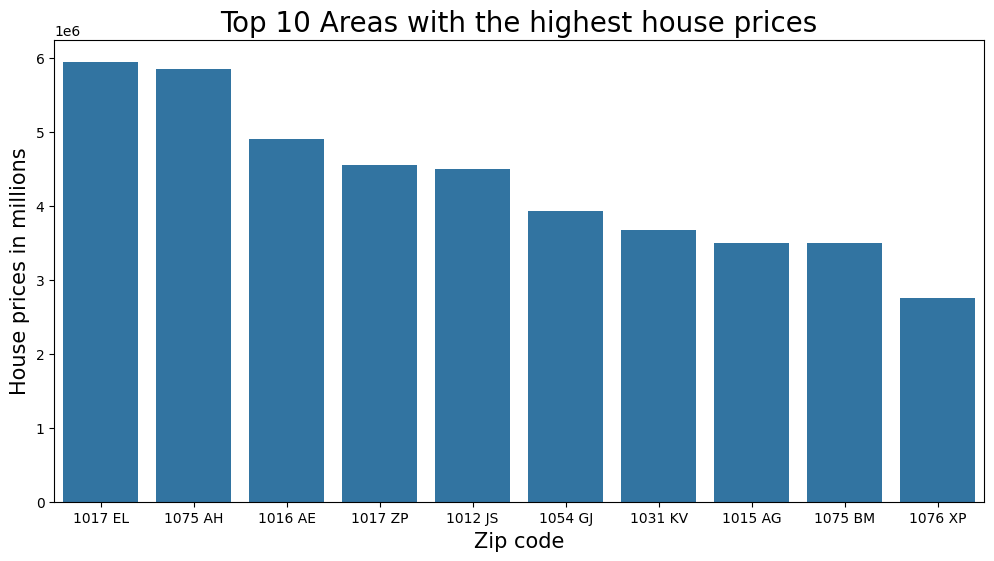

In [8]:
# case 2: advanced 1
plt.figure(figsize= (12,6))
data = houseprices_sorted[0:10]
ax = sns.barplot(data= data, x= 'Zip',y = 'Price')
ax.set_xlabel('Zip code',fontsize = 15)
ax.set_ylabel('House prices in millions', fontsize = 15)
ax.set_title('Top 10 Areas with the highest house prices', fontsize= 20)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18888\1487709658.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(data=data, x='Zip', y='Price', ax=ax[0], palette='husl')
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18888\1487709658.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(data=data, x='Zip', y='PriceperSqm', ax=ax[1], palette='husl')


Text(0.5, 1.0, 'Top 10 Areas with the highest price per sqm')

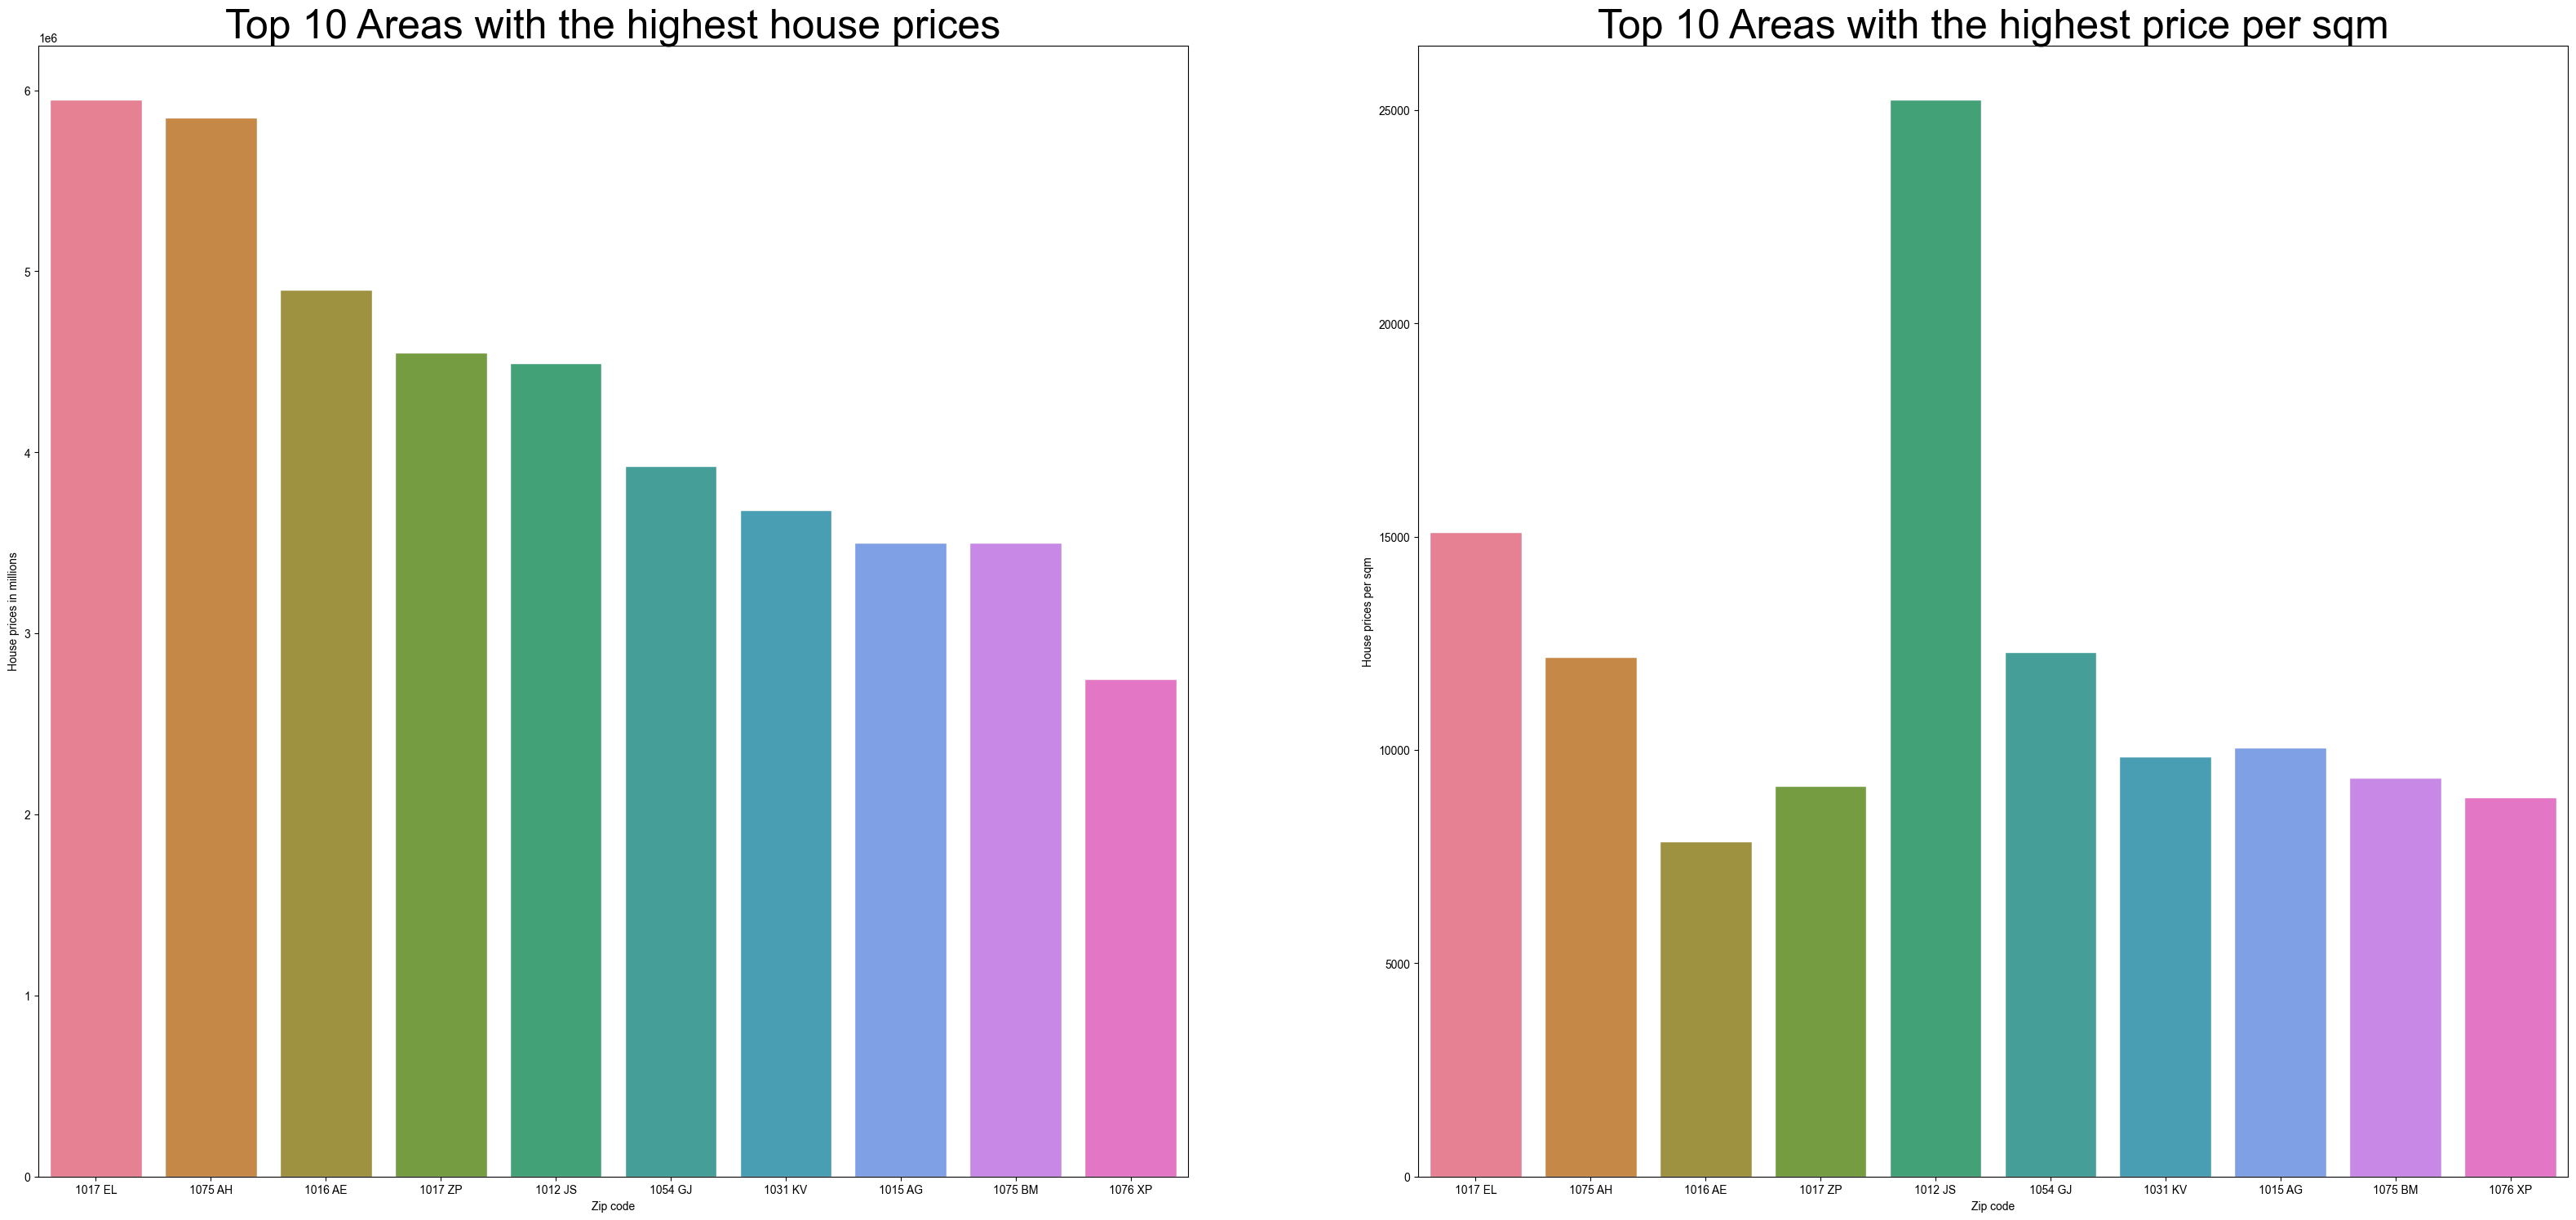

In [9]:
# case 3: view multiple perspectives at once
fig, ax = plt.subplots(1, 2, figsize=(40, 18))
data = houseprices_sorted[0:10]
sns.set(font_scale=3)
ax1 = sns.barplot(data=data, x='Zip', y='Price', ax=ax[0], palette='husl')
ax1.set_xlabel('Zip code')
ax1.set_ylabel('House prices in millions')
ax1.set_title('Top 10 Areas with the highest house prices')
ax2 = sns.barplot(data=data, x='Zip', y='PriceperSqm', ax=ax[1], palette='husl')
ax2.set_xlabel('Zip code')
ax2.set_ylabel('House prices per sqm')
ax2.set_title('Top 10 Areas with the highest price per sqm')

### Mở rộng các loại biểu đồ

In [10]:
# Lấy 50 dòng đầu và 50 dòng cuối
df_top_bottom = pd.concat([houseprices_data.head(50), houseprices_data.tail(50)])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18888\2710774262.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=houseprices_data, x='Zip', y='Price', palette='Set3')


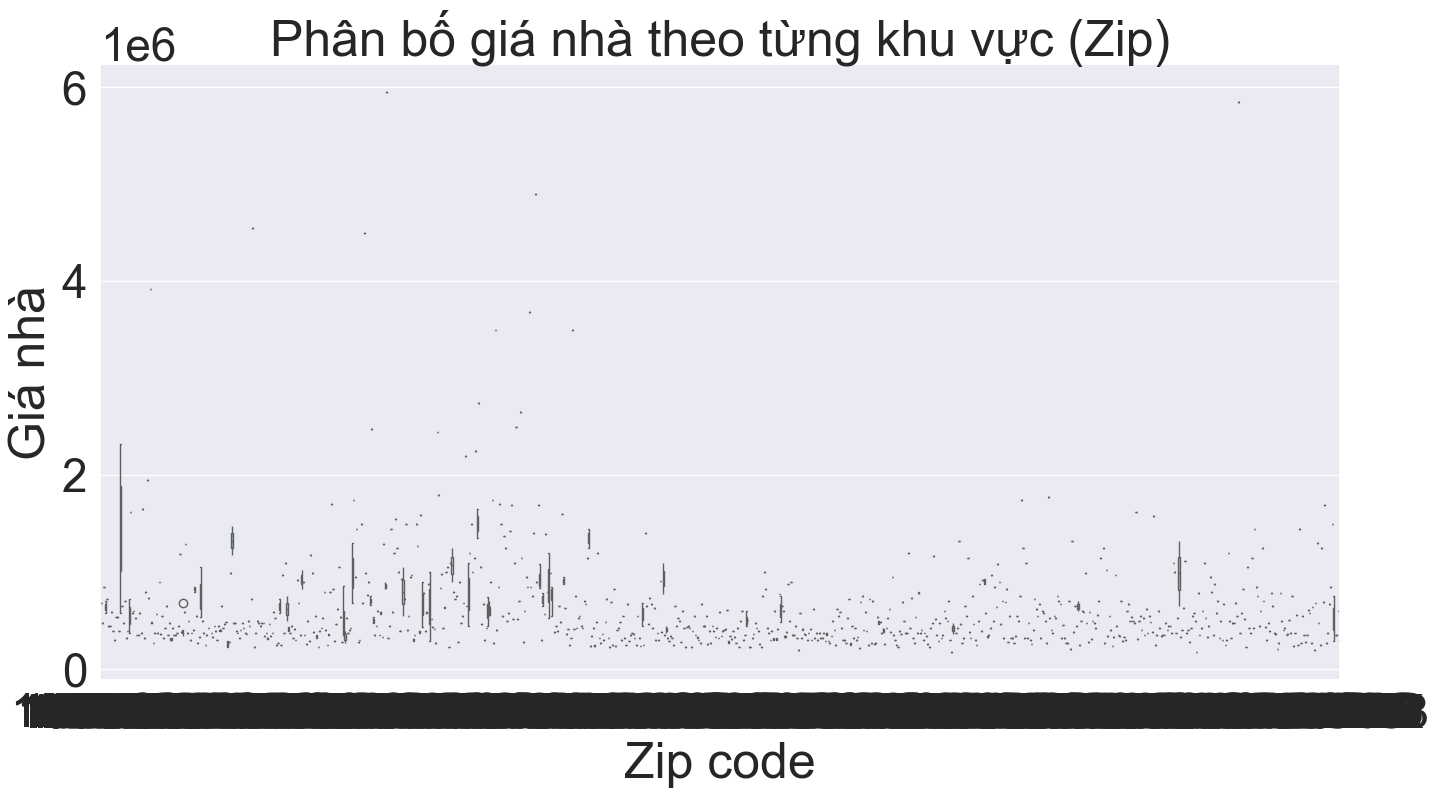

In [11]:
# Boxplot: Phân bố giá nhà theo từng khu vực (Zip)
plt.figure(figsize=(16,8))
sns.boxplot(data=houseprices_data, x='Zip', y='Price', palette='Set3')
plt.title('Phân bố giá nhà theo từng khu vực (Zip)')
plt.xlabel('Zip code')
plt.ylabel('Giá nhà')
plt.show()

- Mục đích:
Giúp bạn quan sát sự phân bố giá nhà, phát hiện các giá trị ngoại lai (outlier) và so sánh mức giá giữa các khu vực.

- Phân tích:
Nếu hộp (box) của khu vực nào cao và rộng, khu vực đó có giá nhà cao và biến động lớn. Nếu có nhiều dấu chấm ngoài hộp, đó là các căn nhà có giá bất thường.

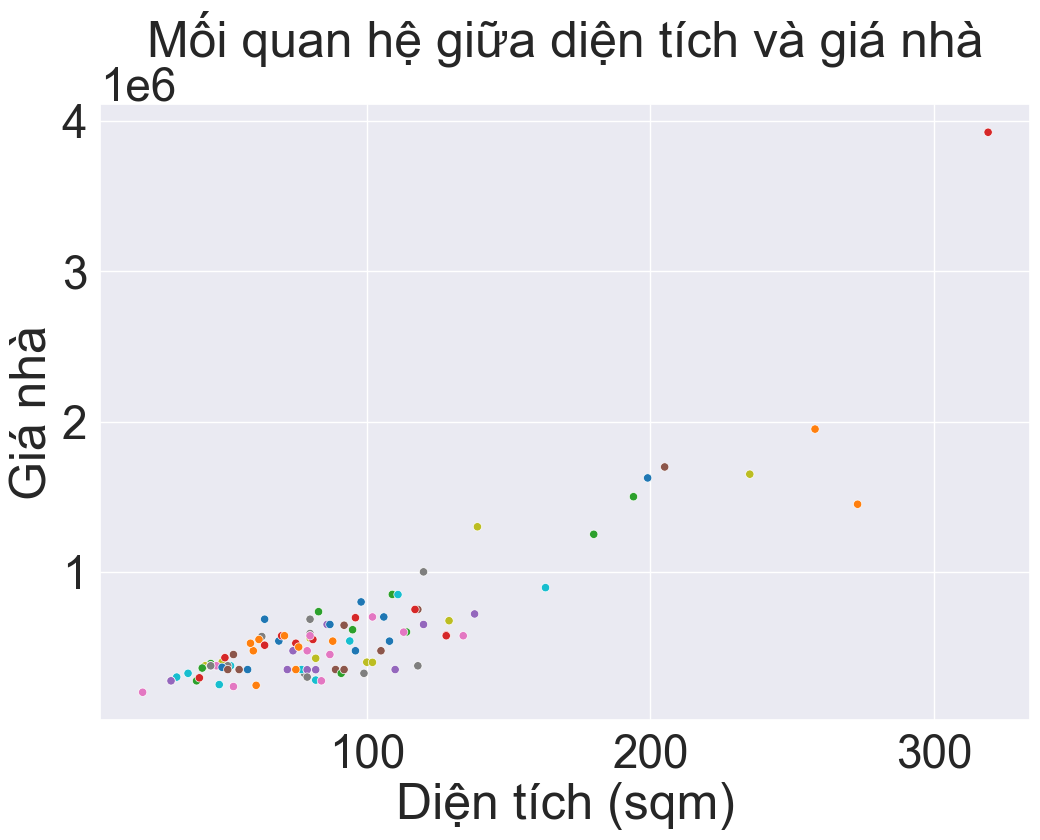

In [12]:
# Biểu đồ Scatter: Mối quan hệ giữa diện tích và giá nhà
plt.figure(figsize=(12,8))
sns.scatterplot(data=df_top_bottom, x='Area', y='Price', hue='Zip', palette='tab10', legend=False)
plt.title('Mối quan hệ giữa diện tích và giá nhà')
plt.xlabel('Diện tích (sqm)')
plt.ylabel('Giá nhà')
plt.show()

Mục đích:
Kiểm tra xem diện tích có ảnh hưởng như thế nào đến giá nhà, và có khu vực nào nổi bật về giá hoặc diện tích không.

Phân tích:
Nếu điểm càng lên cao theo chiều ngang, giá nhà càng tăng theo diện tích. Nếu có điểm nằm xa khỏi xu hướng chung, đó là các căn nhà đặc biệt.

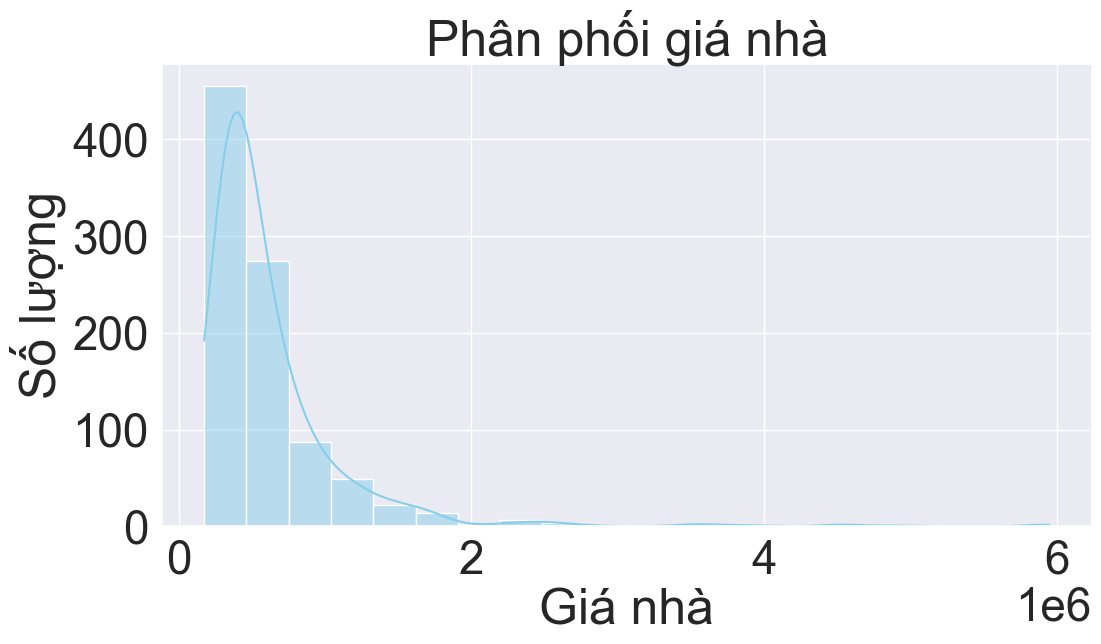

In [13]:
# Histogram: Phân phối giá nhà
plt.figure(figsize=(12,6))
sns.histplot(houseprices_data['Price'], bins=20, kde=True, color='skyblue')
plt.title('Phân phối giá nhà')
plt.xlabel('Giá nhà')
plt.ylabel('Số lượng')
plt.show()

Mục đích:
Xem giá nhà tập trung ở mức nào, có nhiều nhà giá rẻ hay giá cao.

Phân tích:
Nếu biểu đồ lệch phải, đa số nhà có giá thấp, chỉ một số ít nhà giá rất cao. Nếu phân phối đều, thị trường đa dạng giá.

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18888\2931157678.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_top_bottom, x='Zip', y='Price', palette='Pastel1')


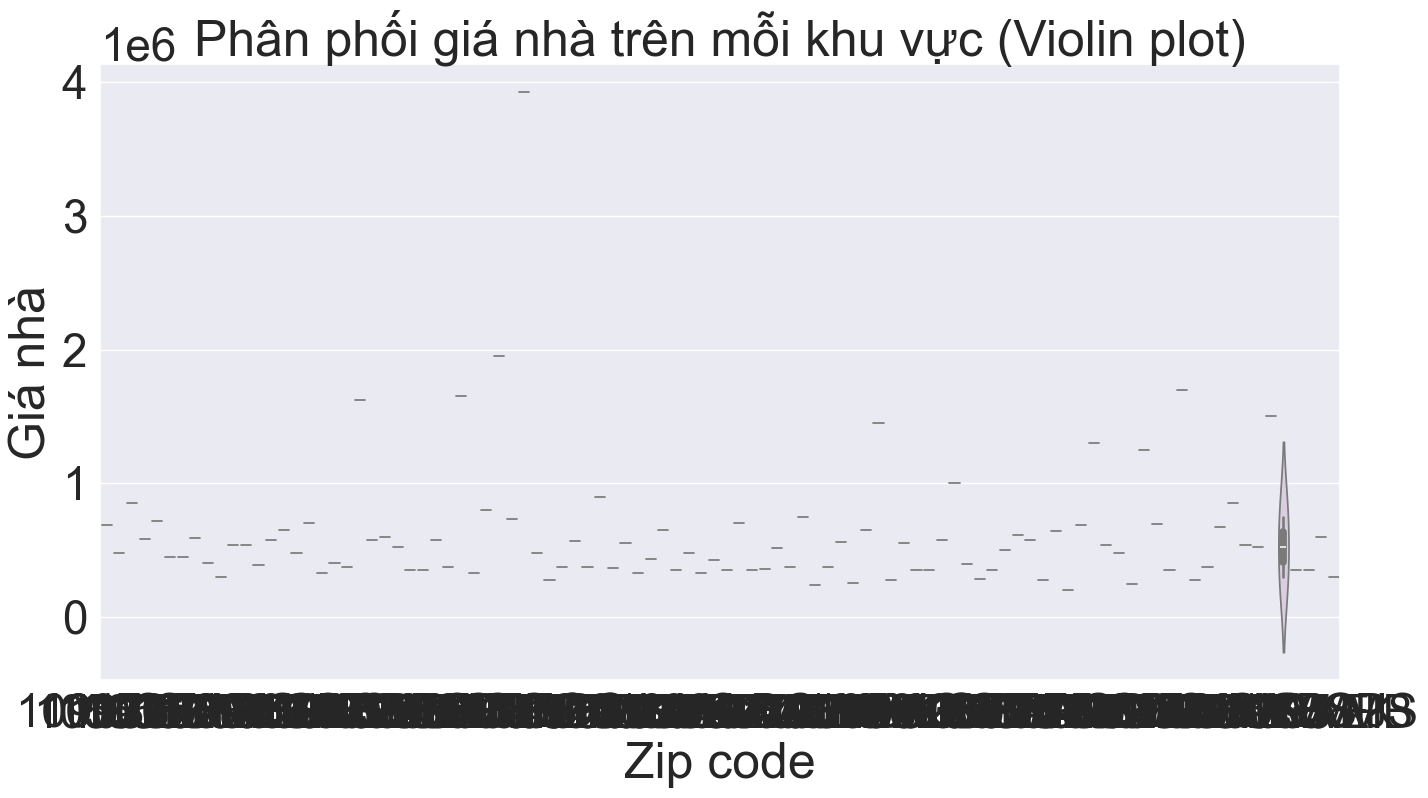

In [14]:
# Violin: Phân phối giá nhà trên mỗi khu vực
plt.figure(figsize=(16,8))
sns.violinplot(data=df_top_bottom, x='Zip', y='Price', palette='Pastel1')
plt.title('Phân phối giá nhà trên mỗi khu vực (Violin plot)')
plt.xlabel('Zip code')
plt.ylabel('Giá nhà')
plt.show()

Mục đích:
Kết hợp giữa boxplot và histogram, giúp thấy rõ hơn mật độ giá nhà ở từng khu vực.

Phân tích:
Khu vực nào có "violin" phình to ở đâu thì giá nhà tập trung nhiều ở mức đó. Nếu "đuôi" dài, có nhiều giá trị ngoại lai.

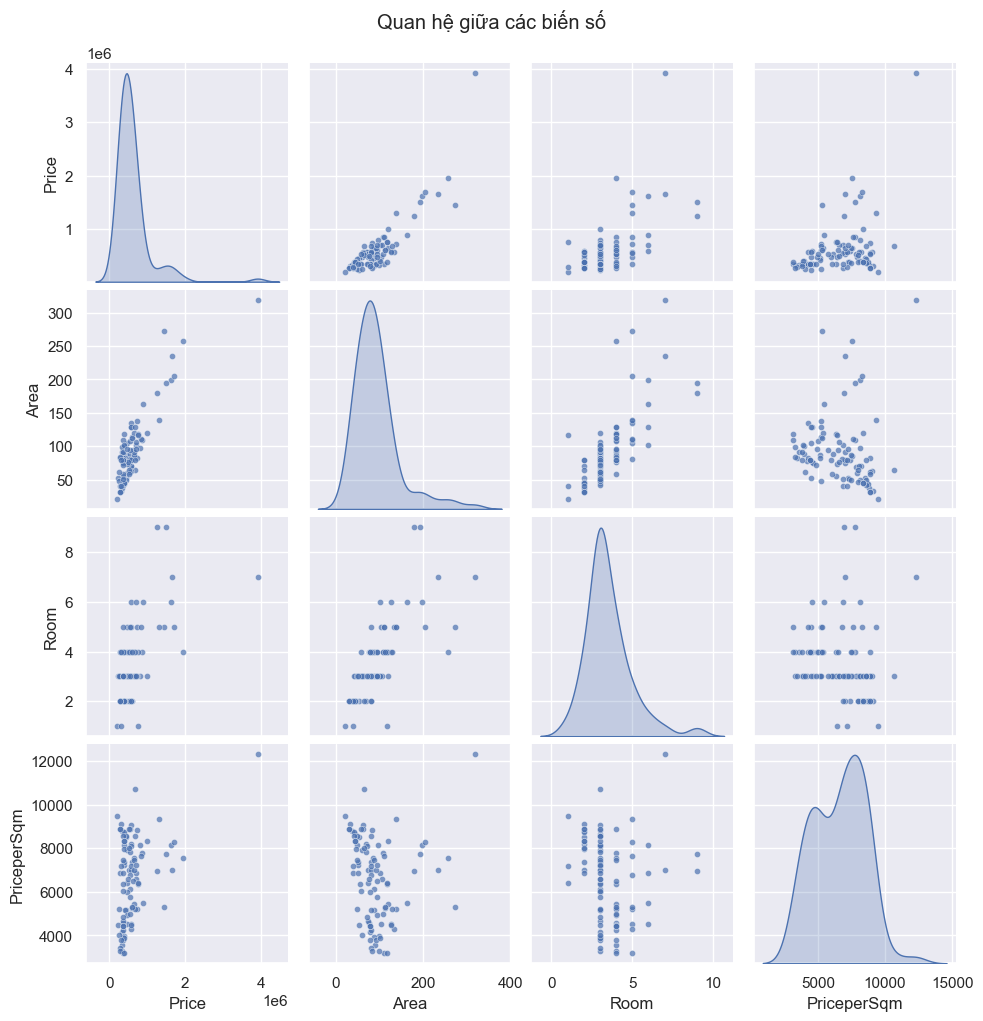

In [15]:
# Pairplot: Quan hệ giữa các biến số
sns.set_context("notebook", font_scale=1)  # hoặc font_scale nhỏ hơn nữa nếu muốn
sns.pairplot(df_top_bottom[['Price', 'Area', 'Room', 'PriceperSqm']], diag_kind='kde', plot_kws={'s': 20, 'alpha': 0.7})
plt.suptitle('Quan hệ giữa các biến số', y=1.02)
plt.show()

Mục đích:
Quan sát mối quan hệ giữa các biến số như Giá, Diện tích, Số phòng, Giá/m2.

Phân tích:

Các biểu đồ scatter cho thấy biến nào liên quan chặt chẽ với nhau (ví dụ: diện tích và giá). Đường chéo là phân phối từng biến.

Ý nghĩa từng phần của pairplot:

Đường chéo (Diagonal):

Các ô trên đường chéo là biểu đồ phân phối (kde plot) của từng biến:

Price: Phân phối giá nhà

Area: Phân phối diện tích

Room: Phân phối số phòng

PriceperSqm: Phân phối giá trên mỗi mét vuông

Điều này giúp bạn biết biến nào có phân phối lệch, chuẩn hay có nhiều giá trị ngoại lai.

Các ô ngoài đường chéo (Off-diagonal):

Là các scatter plot thể hiện mối quan hệ giữa từng cặp biến.

Price vs Area: Nếu các điểm tạo thành một đường chéo đi lên, nghĩa là diện tích càng lớn thì giá nhà càng cao (tương quan dương).

Price vs Room: Nếu số phòng tăng mà giá cũng tăng, hai biến này có liên hệ.

Price vs PriceperSqm: Có thể thấy các điểm phân tán, nếu tập trung thành một cụm thì giá nhà và giá/m2 có mối liên hệ mạnh.

Area vs Room: Nếu diện tích lớn thì số phòng cũng nhiều, hai biến này sẽ có xu hướng tăng cùng nhau.

Các cặp khác: Giúp phát hiện các mối liên hệ bất thường hoặc ngoại lệ.

Phân tích sâu hơn:

Nếu các điểm trong scatter plot tạo thành một đường thẳng hoặc hình elip kéo dài, hai biến đó có mối tương quan mạnh.

Nếu các điểm phân tán rộng, hai biến đó ít liên hệ với nhau.

Nếu có các cụm điểm tách biệt, có thể tồn tại các nhóm đặc biệt trong dữ liệu (ví dụ: khu vực cao cấp, nhà nhỏ giá cao...).

Đường chéo càng nhọn (kde plot), dữ liệu càng tập trung quanh một giá trị; càng bè, dữ liệu càng phân tán.

Ứng dụng thực tế:

Giúp bạn chọn biến nào để xây dựng mô hình dự báo giá nhà.

Phát hiện các biến có thể gây nhiễu hoặc không liên quan.

Phát hiện ngoại lệ (outlier) dễ dàng.

Kết luận:

Pairplot là công cụ tổng quan, giúp bạn nhanh chóng nhận diện các mối quan hệ, xu hướng và bất thường giữa các biến số trong dữ liệu nhà đất.